Compare different Ising models trained on the same data with the same procedure and parameters.

In [33]:
import os
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt
import hcpdatautils as hcp

In [2]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [3]:
model_dir = 'E:\\Ising_model_results_daai'
h_validation = torch.load( os.path.join(model_dir, 'h_data_validation_nodes_21_reps_10_epochs_200_p_0.019999999552965164_lr_0.001_threshold_0.1_start_0_end_83.pt') )
print( h_validation.size() )
h_training = torch.load( os.path.join(model_dir, 'h_data_training_nodes_21_reps_10_epochs_200_p_0.019999999552965164_lr_0.001_threshold_0.1_start_0_end_699.pt') )
print( h_training.size() )
J_validation = torch.load( os.path.join(model_dir, 'J_data_validation_nodes_21_reps_10_epochs_200_p_0.019999999552965164_lr_0.001_threshold_0.1_start_0_end_83.pt') )
print( J_validation.size() )
J_training = torch.load( os.path.join(model_dir, 'J_data_training_nodes_21_reps_10_epochs_200_p_0.019999999552965164_lr_0.001_threshold_0.1_start_0_end_699.pt') )
print( J_training.size() )

torch.Size([10, 83, 21])
torch.Size([10, 669, 21])
torch.Size([10, 83, 21, 21])
torch.Size([10, 669, 21, 21])


In [8]:
def plot_range_histogram(name:str, values:torch.Tensor, data_subset:str, rep_dim:int=0):
    num_reps = values.size(dim=rep_dim)
    values_ranges = ( values.max(dim=rep_dim).values - values.min(dim=rep_dim).values ).flatten()
    print( values_ranges.min().item(), values_ranges.max().item() )
    values_ranges_np = values_ranges.detach().cpu().numpy()
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    axs.hist(values_ranges_np)
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel(f'range of {name} over {num_reps} repetitions')
    axs.set_ylabel('count in bin')
    axs.set_title(f'distribution of {name} ranges for models trained on {data_subset} data')
    plt.show()

In [19]:
def plot_value_histogram(name:str, values:torch.Tensor, data_subset:str, rep_dim:int=0):
    print( values.min().item(), values.median().item(), values.max().item() )
    values_np = values.flatten().detach().cpu().numpy()
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    axs.hist(values_np)
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel(f'{name} value')
    axs.set_ylabel('count in bin')
    axs.set_title(f'distribution of {name} for models trained on {data_subset} data')
    plt.show()

0.017794683575630188 0.17628471553325653


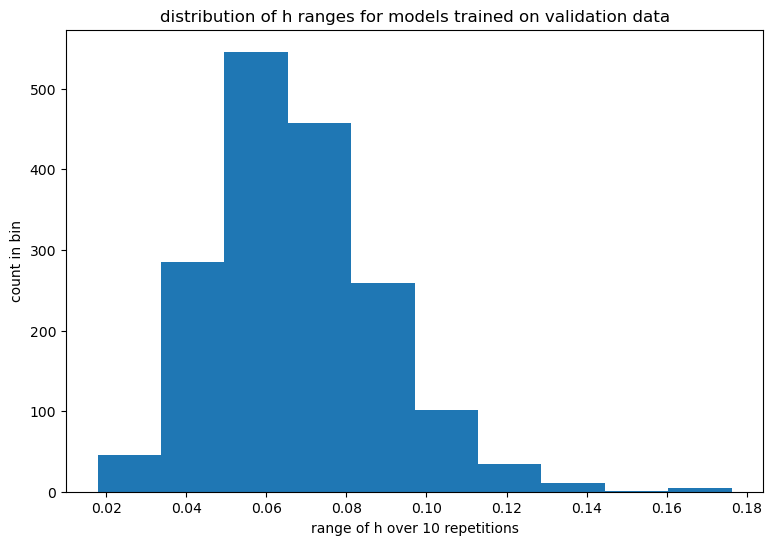

In [9]:
plot_range_histogram(name='h', values=h_validation, data_subset='validation')

-0.4030379354953766 -0.02877582237124443 0.3203744888305664


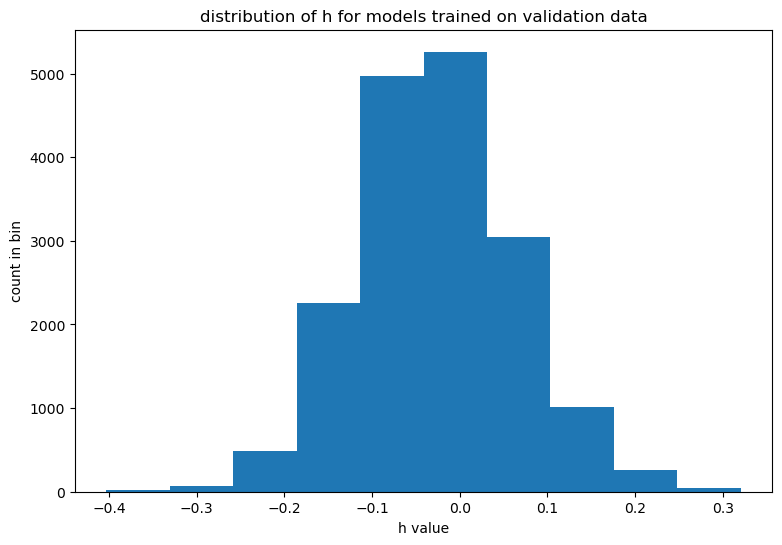

In [20]:
plot_value_histogram(name='h', values=h_validation, data_subset='validation')

0.015783339738845825 0.18709909915924072


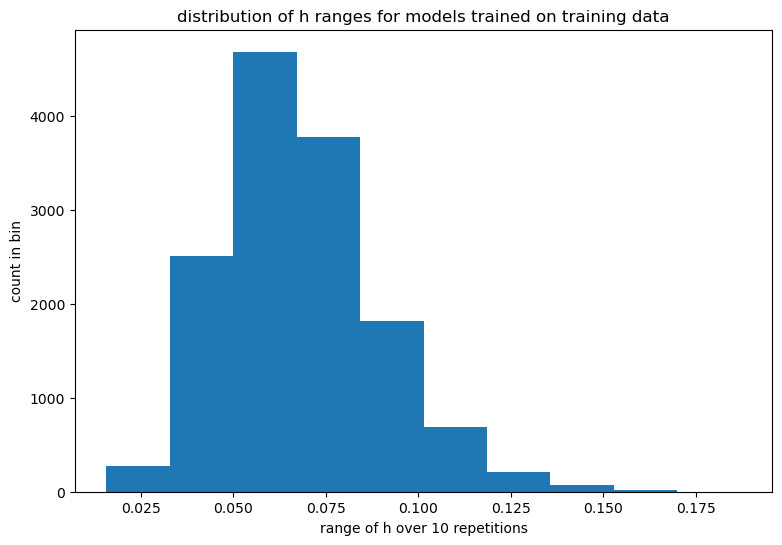

In [11]:
plot_range_histogram(name='h', values=h_training, data_subset='training')

-0.45420438051223755 -0.029447806999087334 0.3854595720767975


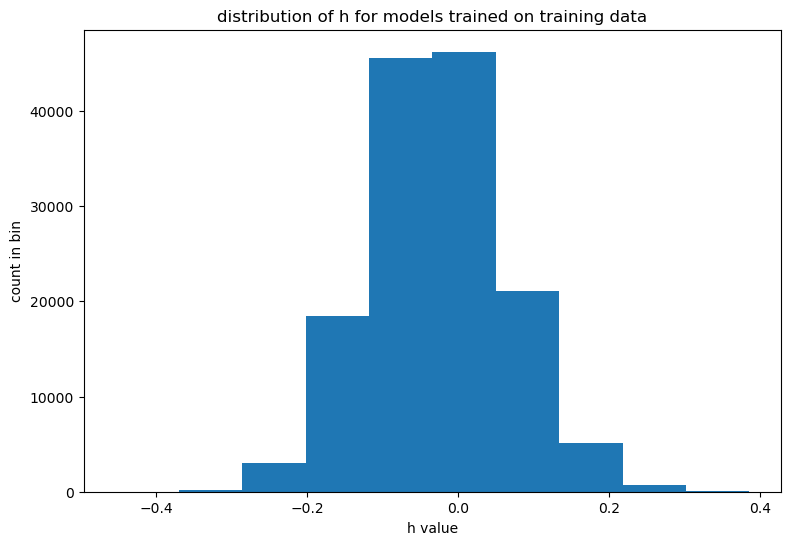

In [21]:
plot_value_histogram(name='h', values=h_training, data_subset='training')

0.0 1.6306833028793335


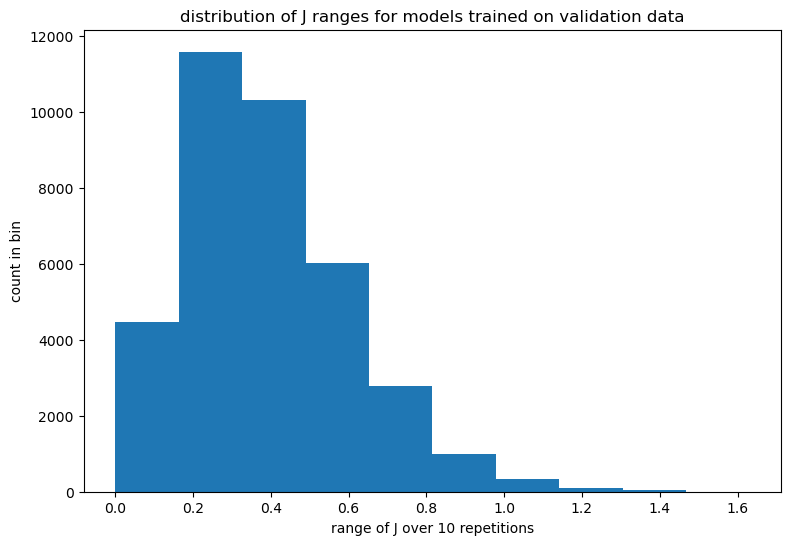

In [12]:
plot_range_histogram(name='J', values=J_validation, data_subset='validation')

-1.3733347654342651 0.0899922177195549 2.154289722442627


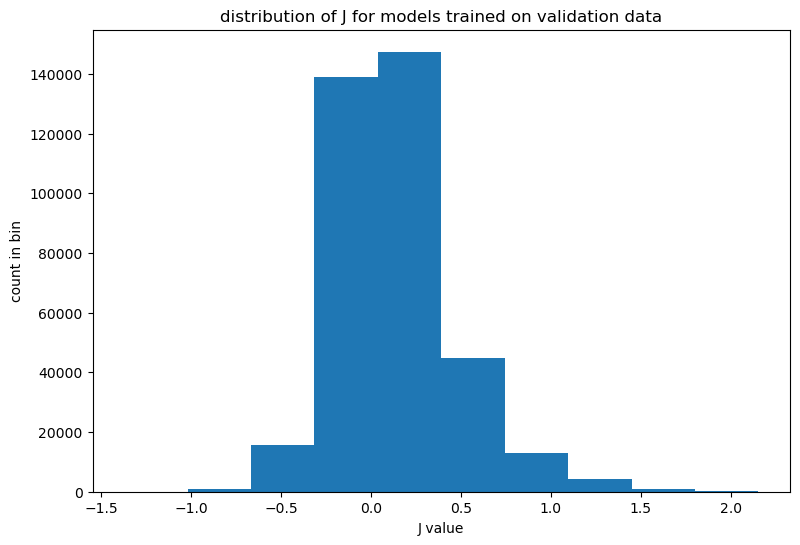

In [22]:
plot_value_histogram(name='J', values=J_validation, data_subset='validation')

0.0 2.041100025177002


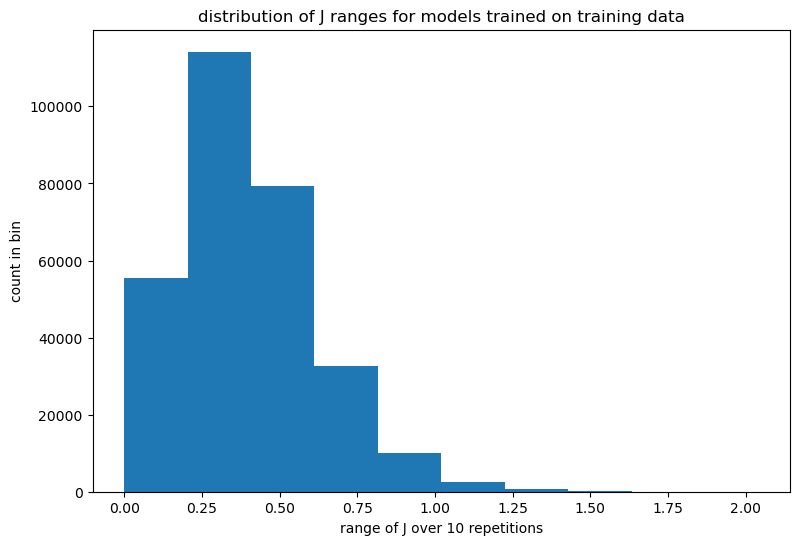

In [13]:
plot_range_histogram(name='J', values=J_training, data_subset='training')

-1.567815899848938 0.09074079245328903 2.370713233947754


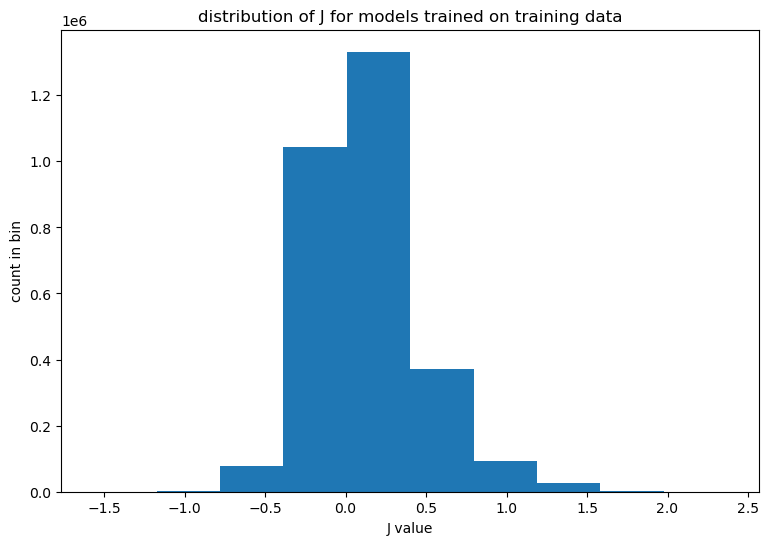

In [23]:
plot_value_histogram(name='J', values=J_training, data_subset='training')

In [62]:
J_max_of_subject = torch.max(  torch.max( J_training.max(dim=0).values - J_training.min(dim=0).values, dim=-1 ).values, dim=-1  ).values
print( J_max_of_subject.size() )
subject_index = torch.argmax(J_max_of_subject)
print(subject_index)

torch.Size([669])
tensor(456, device='cuda:0')


In [63]:
# subject_index = 0
h_subject = h_training[:,subject_index,:]
J_subject = J_training[:,subject_index,:,:]
num_reps = h_subject.size(dim=0)
num_regions = h_subject.size(dim=-1)

In [64]:
data_dir = 'E:\\HCP_data'
region_names, region_coords = hcp.load_roi_info(directory_path=data_dir, dtype=float_type, device=device)
training_subjects = hcp.load_training_subjects(directory_path=data_dir)
subject_id = training_subjects[subject_index]

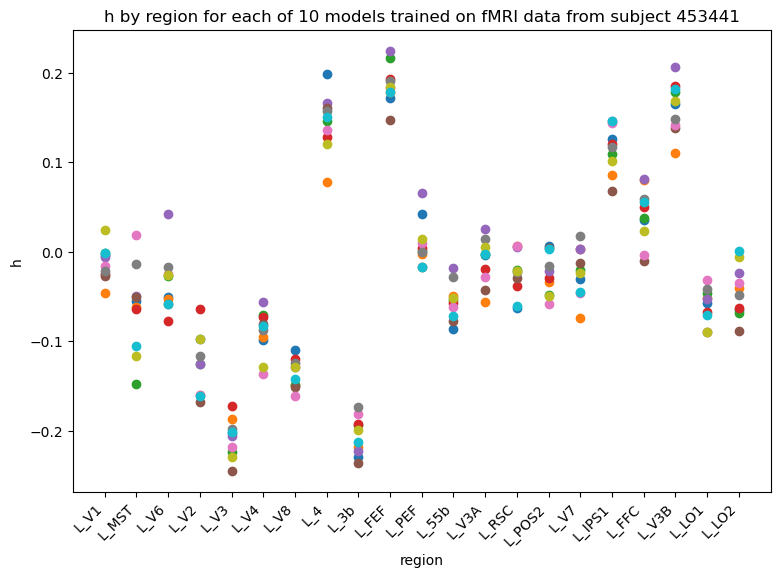

In [65]:
h_subject_np = h_subject.detach().cpu().numpy()
regions = np.arange(num_regions)
fig, axs = plt.subplots( nrows=1, ncols=1, figsize=(9, 6) )
for rep in range(num_reps):
    axs.scatter(regions, h_subject_np[rep,:])
plt.xticks(ticks=regions)
axs.set_xticklabels( region_names[:num_regions], rotation=45, ha='right' )
axs.set_xlabel('region')
axs.set_ylabel('h')
axs.set_title(f'h by region for each of {num_reps} models trained on fMRI data from subject {subject_id}')
plt.show()

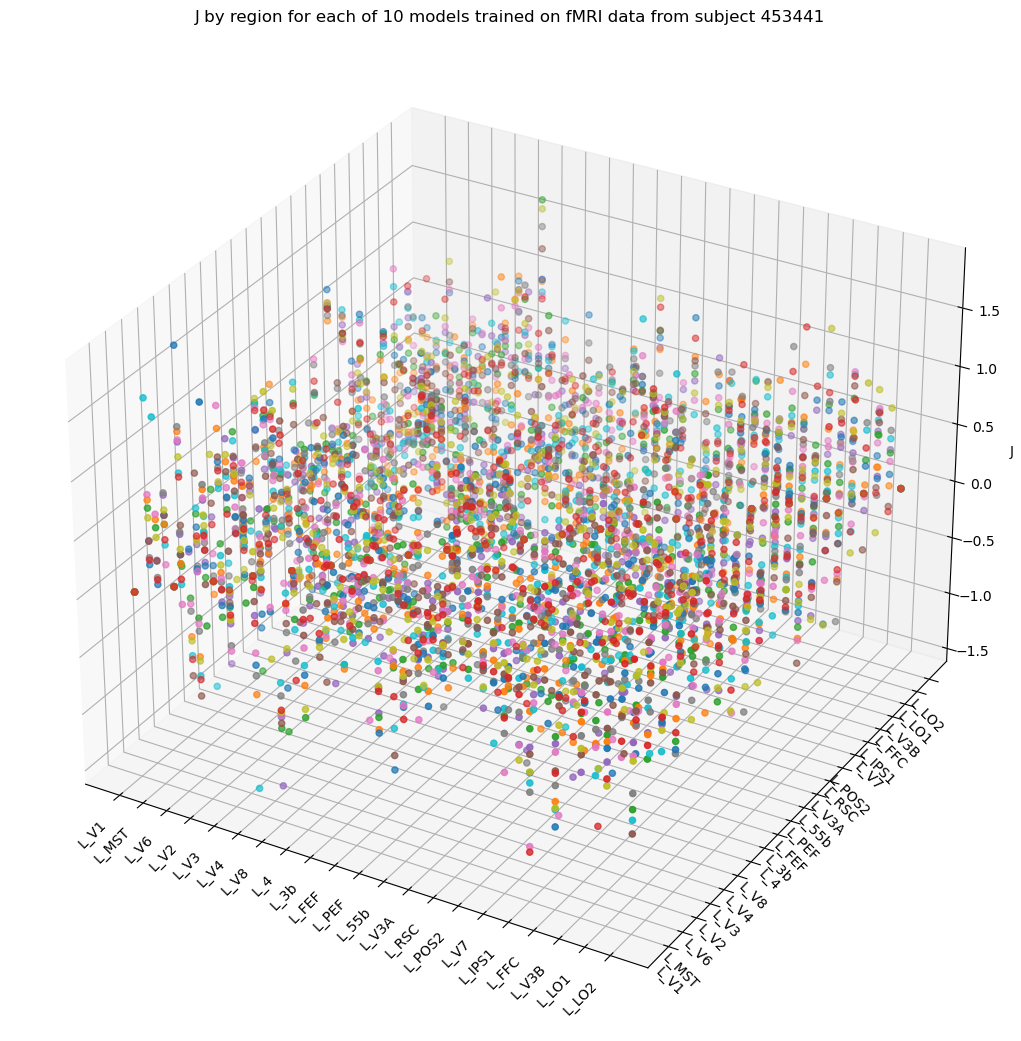

In [66]:
J_subject_np = J_subject.detach().cpu().numpy()
regions_regions = np.arange(num_regions).repeat(num_regions).reshape( (num_regions, num_regions) )
fig = plt.figure( figsize=(13, 13) )
ax = fig.add_subplot(projection='3d')
# fig, axs = plt.subplots( nrows=1, ncols=1, figsize=(9, 6) )
for rep in range(num_reps):
    ax.scatter( regions_regions, regions_regions.transpose(), J_subject_np[rep,:,:] )
plt.xticks(ticks=regions)
ax.set_xticklabels( region_names[:num_regions], rotation=45, ha='right' )
plt.yticks(ticks=regions)
ax.set_yticklabels( region_names[:num_regions], rotation=-45, ha='right' )
# ax.set_xlabel('source region')
# ax.set_ylabel('target region')
ax.set_zlabel('J')
ax.set_title(f'J by region for each of {num_reps} models trained on fMRI data from subject {subject_id}')
plt.show()

In [102]:
def plot_rep_and_mean_stats_by_subject(stats_dir:str, subset:str, stat_file_name:str, stat_label:str):
    rep_values = torch.load( os.path.join(stats_dir, f'fc_{stat_file_name}_data_{subset}_nodes_21_reps_10_epochs_200_p_0.019999999552965164_lr_0.001_threshold_0.1_mean_testing.pt') )
    rep_min_values = rep_values.min(dim=0).values.detach().cpu().numpy()
    # rep_median_values = rep_values.median(dim=0).values.detach().cpu().numpy()
    rep_mean_values = rep_values.mean(dim=0).detach().cpu().numpy()
    rep_max_values = rep_values.max(dim=0).values.detach().cpu().numpy()
    mean_model_values = torch.load( os.path.join(stats_dir, f'fc_{stat_file_name}_mean_data_{subset}_nodes_21_reps_10_epochs_200_p_0.019999999552965164_lr_0.001_threshold_0.1_mean_testing.pt') ).squeeze().detach().cpu().numpy()
    num_subjects = np.size(mean_model_values)
    subject_indices = np.arange(num_subjects)
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    # axs.boxplot(values_np, positions=epoch_positions_np)
    axs.scatter(subject_indices, mean_model_values, marker='*', label=f'{stat_label} of mean model')
    axs.scatter(subject_indices, rep_max_values, marker='^', label=f'max individual model {stat_label}')
    # axs.scatter(subject_indices, rep_median_values, marker='o', label='median individual model')
    axs.scatter(subject_indices, rep_mean_values, marker='o', label=f'mean {stat_label} of individual models')
    axs.scatter(subject_indices, rep_min_values, marker='v', label=f'min individual model {stat_label}')
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel('subject')
    axs.set_ylabel(stat_label)
    axs.set_title(f'{stat_label} of individual and mean Ising models for each {subset} subject')
    plt.legend()
    plt.show()
    num_gt_min = np.count_nonzero(mean_model_values > rep_min_values)
    print(f'{subset} subjects with mean model {stat_label} greater than that of at least one individual model: {num_gt_min}')
    num_gt_mean = np.count_nonzero(mean_model_values > rep_mean_values)
    print(f'{subset} subjects with mean model {stat_label} greater than mean of individual model values: {num_gt_min}')
    num_gt_max = np.count_nonzero(mean_model_values > rep_max_values)
    print(f'{subset} subjects with mean model {stat_label} greater than those of all individual models: {num_gt_max}')

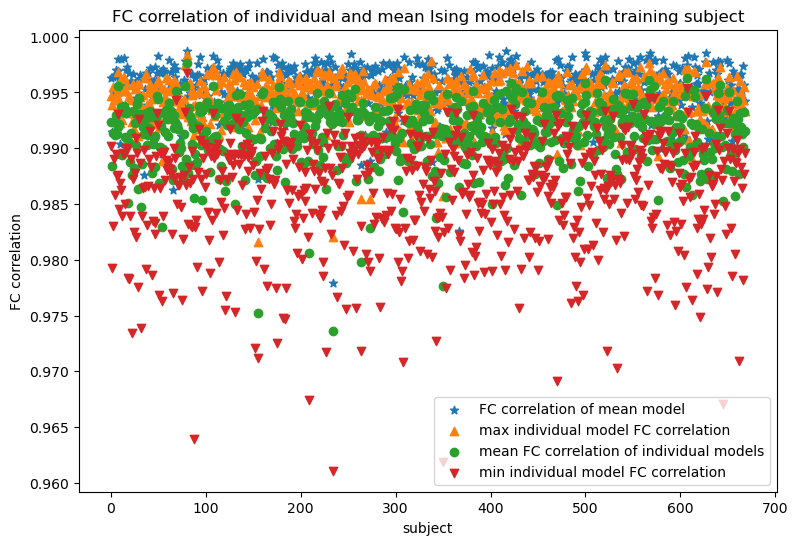

training subjects with mean model FC correlation greater than that of at least one individual model: 667
training subjects with mean model FC correlation greater than mean of individual model values: 667
training subjects with mean model FC correlation greater than those of all individual models: 549


In [103]:
stats_dir = model_dir
plot_rep_and_mean_stats_by_subject(stats_dir=stats_dir, subset='training', stat_file_name='corr', stat_label='FC correlation')

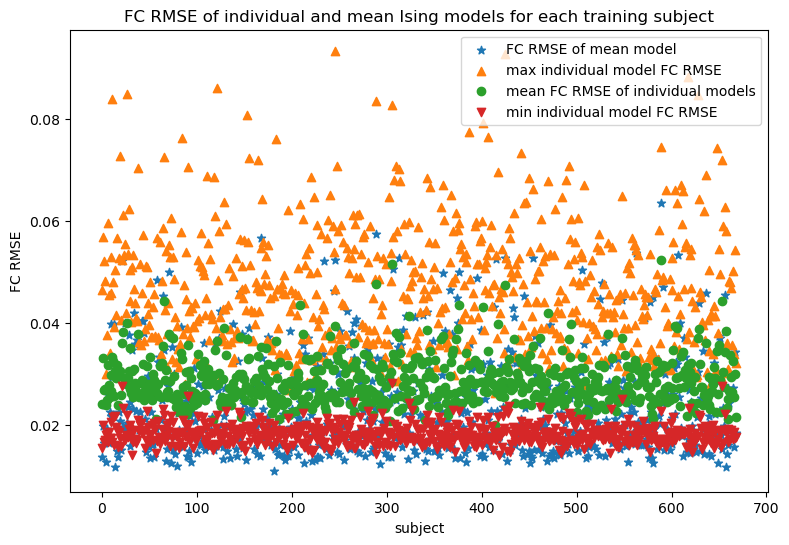

training subjects with mean model FC RMSE greater than that of at least one individual model: 431
training subjects with mean model FC RMSE greater than mean of individual model values: 431
training subjects with mean model FC RMSE greater than those of all individual models: 18


In [104]:
plot_rep_and_mean_stats_by_subject(stats_dir=stats_dir, subset='training', stat_file_name='rmse', stat_label='FC RMSE')

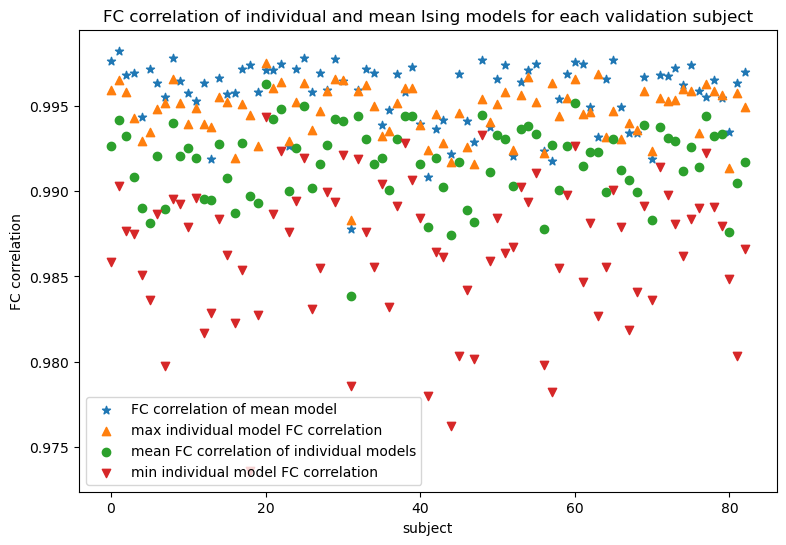

validation subjects with mean model FC correlation greater than that of at least one individual model: 83
validation subjects with mean model FC correlation greater than mean of individual model values: 83
validation subjects with mean model FC correlation greater than those of all individual models: 66


In [105]:
plot_rep_and_mean_stats_by_subject(stats_dir=stats_dir, subset='validation', stat_file_name='corr', stat_label='FC correlation')

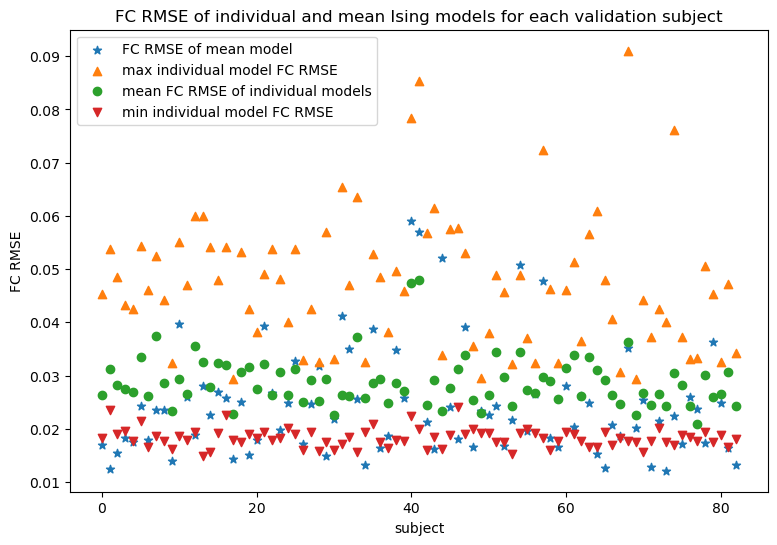

validation subjects with mean model FC RMSE greater than that of at least one individual model: 56
validation subjects with mean model FC RMSE greater than mean of individual model values: 56
validation subjects with mean model FC RMSE greater than those of all individual models: 2


In [106]:
plot_rep_and_mean_stats_by_subject(stats_dir=stats_dir, subset='validation', stat_file_name='rmse', stat_label='FC RMSE')